Note: since i have exams this week, i have not used so much time on the exercise, but will come back next week. 

### Mads Lind

# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [37]:
#Importing data
data = pd.read_csv("peer_effects_room.csv") 


data.head()

,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [60]:
# [Answer to ex. 12.1.1 here]

df=data
df=df.merge(df[['person','room']], on='room',suffixes=('', '_other') )
df = df.query("person != person_other")
df.head()

,person,room,high_school_GPA,college_GPA,person_other
1,0,351,-1.715472,-1.285307,1645
2,1645,351,-0.818594,-0.434847,0
5,1,738,-0.530190,-0.031833,1039
6,1039,738,-0.493444,0.299729,1
9,2,247,-0.589543,-0.203230,944


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [73]:
# [Answer to ex. 12.1.2 here]
#Adding the other persons grade data and is deleting dublicated colums. 
df_re=df.merge(df, left_on='person_other', right_on='person', suffixes=('', '_other'))
df_re = df_re.loc[:,~df_re.columns.duplicated()]
del df_re['room_other']
del df_re['person_other_other']
df_new=df_re

In [74]:
df_new.head()

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
1,1645,351,-0.818594,-0.434847,0,-1.715472,-1.285307
2,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
3,1039,738,-0.493444,0.299729,1,-0.530190,-0.031833
4,2,247,-0.589543,-0.203230,944,1.281112,-0.479543


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

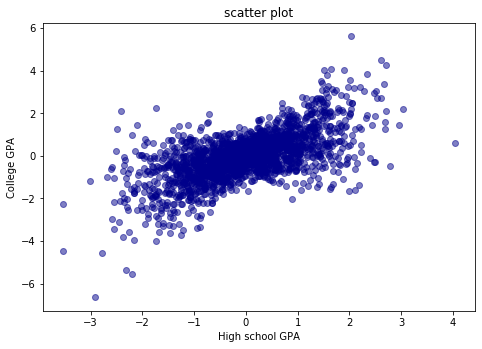

In [86]:
# [Answer to ex. 12.1.3 scatterplot of own grades]

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_new['high_school_GPA'], df_new['college_GPA'], color='darkblue', alpha=0.5)
ax.set_xlabel('High school GPA')
ax.set_ylabel('College GPA')
ax.set_title('scatter plot')
plt.show()

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

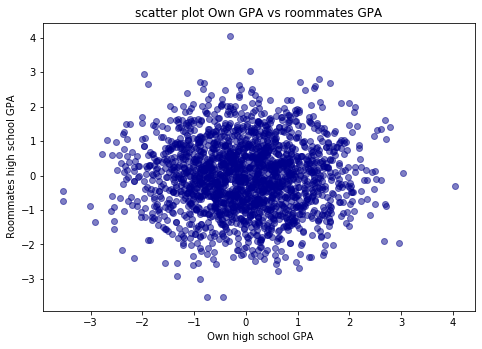

In [90]:
# [Answer to ex. 12.1.4 here]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_new['high_school_GPA'], df_new['high_school_GPA_other'], color='darkblue', alpha=0.5)
ax.set_xlabel(' Own high school GPA')
ax.set_ylabel(' Roommates high school GPA')
ax.set_title('scatter plot Own GPA vs roommates GPA')
plt.show()

In [95]:
#Running an ols model to see if there is a correlation between roommate and own GPA
#ols(formula, data, subset=None, drop_cols=None, *args, **kwargs)
mod= smf.ols(formula='high_school_GPA ~high_school_GPA_other', data=df_new)
model=mod.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.788
Time:                        18:19:45   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

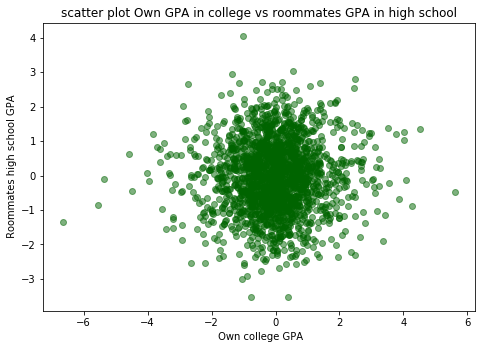

In [98]:
# [Answer to ex. 12.1.5 here]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_new['college_GPA'], df_new['high_school_GPA_other'], color='darkgreen', alpha=0.5)
ax.set_xlabel(' Own college GPA')
ax.set_ylabel(' Roommates high school GPA')
ax.set_title('scatter plot Own GPA in college vs roommates GPA in high school')
plt.show()

In [99]:
# Regsion on own high school GPA
mod2= smf.ols(formula='college_GPA ~high_school_GPA', data=df_new)
model2=mod.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.788
Time:                        18:23:46   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# Regsion on other persons high school GPA
mod3= smf.ols(formula='college_GPA ~high_school_GPA_other', data=df_new)
model3=mod.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.788
Time:                        18:24:34   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_other    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [138]:
# [Answer to ex. 12.1.6 here]

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.